In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
def parser(x):
  return pd.datetime.strptime(x, '%Y-%m')

In [4]:
dataset = pd.read_csv('/content/drive/My Drive/Datasets/sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=False, date_parser=parser)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


In [5]:
dataset.head()

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


# Assignment 9

Untuk dataset sales dan birth:

1. Plot dataset yang digunakan

2. Tentukan apakah dataset yang digunakan terdapat **trend dan atau seasonality**!

3. Nilai hyperparameter untuk ARIMA terbaik beserta nilai RMSEnya. Jelaskan untuk masing-masing hyperparameter!

4. Nilai hyperparameter untuk SARIMA terbaik beserta nilai RMSEnya. Jelaskan untuk masing-masing hyperparameter!

5. Bandingkan nilai RMSE tertinggi dari ARIMA & SARIMA, lalu simpulkan!

# Jawaban:

## No. 1

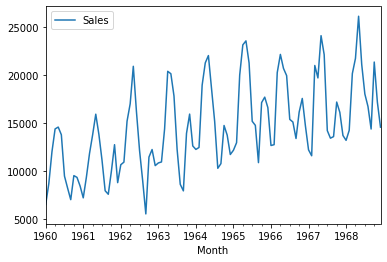

In [6]:
# plot data sales.csv
dataset.plot()
plt.show()

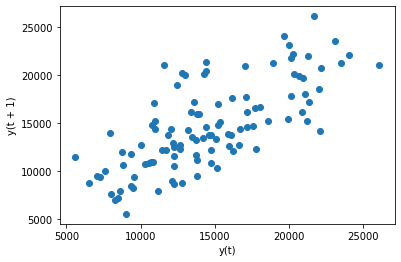

In [7]:
from pandas.plotting import lag_plot

lag_plot(dataset)
plt.show()

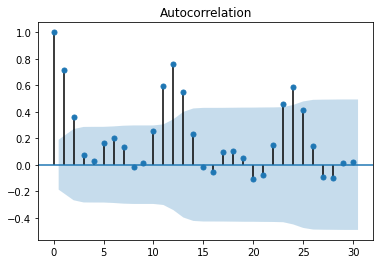

In [8]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(dataset, lags=30, ax=plt.gca())
plt.show()

In [10]:
values = dataset.values
size = int(len(values) * 0.66)
train, test = values[0:size], values[size:len(values)]

In [13]:
from statsmodels.tsa.ar_model import AR

model_ar = AR(train)
model_ar_fit = model_ar.fit()
print('Lag: ', model_ar_fit.k_ar)
print('Coefficients: ', model_ar_fit.params)

Lag:  11
Coefficients:  [ 3.31192629e+02  5.21403077e-01  1.30207151e-01 -1.73253429e-01
 -9.96669751e-02  1.17691037e-01  6.13765393e-02  1.12841504e-02
 -1.03435882e-01 -2.03402141e-02 -5.71119415e-02  6.40944058e-01]


## No. 2
Dari dataset yang digunakan (sales.csv) terdapat trend dan seasonality yang cenderung naik

## No. 3

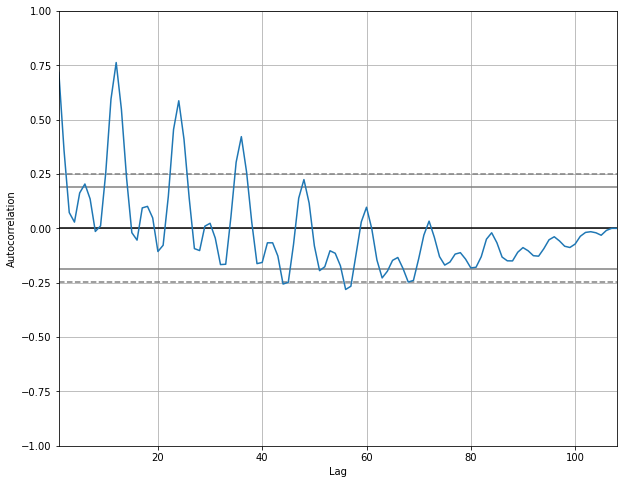

In [ ]:
# melihat grafik autocorelasi dari dataset
plt.figure(figsize=(10, 8))
pd.plotting.autocorrelation_plot(dataset)
plt.show()

In [18]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
values = dataset.values
size = int(len(values) * 0.66)
train, test = values[0:size], values[size:len(values)]
history = [x for x in train]
predictions = []

for t in range(len(test)):
  model = ARIMA(history, order=(9,0,0))
  model_fit = model.fit(disp=0)
  output = model_fit.forecast()
  prediction = output[0]
  predictions.append(prediction)
  expected = test[t]
  history.append(expected)
  print(f'predicted={prediction}, expected={expected}')

error = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: {}'.format(error))

predicted=[18457.93438848], expected=[16611]
predicted=[15607.47806046], expected=[12674]
predicted=[11331.90342361], expected=[12760]
predicted=[14224.08186587], expected=[20249]
predicted=[23226.69818012], expected=[22135]
predicted=[24716.19922675], expected=[20677]
predicted=[14167.87043203], expected=[19933]
predicted=[15429.14300271], expected=[15388]
predicted=[15206.94522975], expected=[15113]
predicted=[17016.23853005], expected=[13401]
predicted=[13574.01626359], expected=[16135]
predicted=[14610.93325919], expected=[17562]
predicted=[17636.61232759], expected=[14720]
predicted=[14434.48081545], expected=[12225]
predicted=[11043.32852637], expected=[11608]
predicted=[13541.00567249], expected=[20985]
predicted=[23483.95939045], expected=[19692]
predicted=[20270.58639408], expected=[24081]
predicted=[18733.68157646], expected=[22114]
predicted=[18142.40417261], expected=[14220]
predicted=[13590.10141729], expected=[13434]
predicted=[12709.63840283], expected=[13598]
predicted=

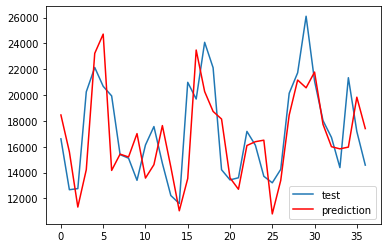

In [ ]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['test', 'prediction'])
plt.show()

In [ ]:
# mengevaluasi ARIMA model dengan order (p,d,q)
def evaluate_arima_model(X, arima_order):
  # menyiapkan training dataset
  train_size = int(len(X) * 0.66)
  train, test = X[0:train_size], X[train_size:]
  history = [x for x in train]
  # membuat prediksi
  predictions = []
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # mengkalkulasi sample error
  error = mean_squared_error(test, predictions)
  return error

# mengevaluasi combinasi dari nilai p, d, dan q untuk ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
  dataset = dataset.astype('float32')
  best_score, best_cfg = float('inf'), None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order = (p,d,q)
        try:
          mse = evaluate_arima_model(dataset, order)
          if mse < best_score:
            best_score, best_cfg = mse, order
          print('ARIMA%s MSE=%.3f' % (order,mse))
        except:
          continue
  print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
  print('RMSE: ', sqrt(best_score))

In [ ]:
import warnings

p_values = range(0, 10)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings('ignore')

evaluate_models(values, p_values, d_values, q_values)

ARIMA (0, 0, 0) MSE=23860228.840578318
ARIMA (0, 0, 1) MSE=13871657.44854424
ARIMA (0, 1, 0) MSE=13540638.651476514
ARIMA (0, 1, 1) MSE=14145961.83567353
ARIMA (0, 1, 2) MSE=15295213.974332184
ARIMA (0, 2, 0) MSE=26660415.090675056
ARIMA (0, 2, 1) MSE=13968678.181950074
ARIMA (0, 2, 2) MSE=14572950.038973818
ARIMA (1, 0, 0) MSE=11723714.918862717
ARIMA (1, 0, 1) MSE=11799199.349120503
ARIMA (1, 0, 2) MSE=11389772.765550528
ARIMA (1, 1, 0) MSE=14164796.67694559
ARIMA (1, 2, 0) MSE=22748049.59807261
ARIMA (2, 0, 0) MSE=11999482.717230028
ARIMA (2, 0, 2) MSE=12577205.672042832
ARIMA (2, 1, 0) MSE=14304001.909792421
ARIMA (2, 2, 0) MSE=22715347.0829798
ARIMA (3, 0, 0) MSE=12128041.397741916
ARIMA (3, 1, 0) MSE=12696217.431441277
ARIMA (3, 2, 0) MSE=22046767.13390035
ARIMA (4, 0, 0) MSE=11631872.29605316
ARIMA (4, 1, 0) MSE=11387047.158317238
ARIMA (4, 2, 0) MSE=13540691.643853998
ARIMA (5, 0, 0) MSE=10954906.696860462
ARIMA (5, 1, 0) MSE=10778314.678819725
ARIMA (5, 2, 0) MSE=13784962.0269

In [17]:
MSE = 9503244.125927325
print('RMSE :', np.sqrt(MSE))

RMSE : 3082.7332232821127


## Kesimpulan:
- hyperparameter ARIMA yang terbaik yaitu: p=9, d=0, q=0 dan rmse=3082
- dari hasil paramter tersebut dapat dijelaskan bahwa nilai rmse terbaik berada pada lag = 9 yang mana dapt juga dilihat dari grafik autocorrelasi diatas diamana punjak rentang puncak tertingginya berda di lag 9.
- Serta dapat dilihat dari grafik perbandingan data actual dan prediksi dengan lag = 9 hasil prediksi hampir mendekati data actualnya

# No. 4

In [ ]:
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# Courtesy of Jason Brownlee of Machine Learning Mastery
# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]

# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error

# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1, 2]
	d_params = [0, 1]
	q_params = [0, 1, 2]
	t_params = ['n','c','t','ct']
	P_params = [0, 1, 2]
	D_params = [0, 1]
	Q_params = [0, 1, 2]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models

In [ ]:
n_test = 12

# model configs
cfg_list = sarima_configs()

# grid search
scores = grid_search(dataset.values, cfg_list, n_test)
print('done')

# list top 3 configs
for cfg, error in scores[:3]:
  print(cfg, error)

 > Model[[(0, 0, 0), (0, 0, 0, 0), 'n']] 18608.652
 > Model[[(0, 0, 0), (0, 0, 1, 0), 'n']] 9928.438
 > Model[[(0, 0, 0), (1, 0, 0, 0), 'n']] 3798.000
 > Model[[(0, 0, 0), (0, 0, 2, 0), 'n']] 7278.585
 > Model[[(0, 0, 0), (1, 0, 1, 0), 'n']] 3942.265
 > Model[[(0, 0, 0), (1, 0, 2, 0), 'n']] 3852.155
 > Model[[(0, 0, 0), (2, 0, 0, 0), 'n']] 3924.991
 > Model[[(0, 0, 0), (2, 0, 1, 0), 'n']] 3949.171
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'c']] 5399.238
 > Model[[(0, 0, 0), (0, 0, 1, 0), 'c']] 4061.377
 > Model[[(0, 0, 0), (2, 0, 2, 0), 'n']] 3440.470
 > Model[[(0, 0, 0), (0, 0, 2, 0), 'c']] 4130.492
 > Model[[(0, 0, 0), (1, 0, 0, 0), 'c']] 3502.309
 > Model[[(0, 0, 0), (1, 0, 2, 0), 'c']] 3478.543
 > Model[[(0, 0, 0), (1, 0, 1, 0), 'c']] 3816.618
 > Model[[(0, 0, 0), (2, 0, 0, 0), 'c']] 4094.032
 > Model[[(0, 0, 0), (2, 0, 1, 0), 'c']] 3493.332
 > Model[[(0, 0, 0), (0, 0, 0, 0), 't']] 6760.052
 > Model[[(0, 0, 0), (2, 0, 2, 0), 'c']] 3378.390
 > Model[[(0, 0, 0), (0, 0, 1, 0), 't']] 4512.298

## Kesimpulan:
- Dengan menggunakan SARIMA diperoleh hyperparameter terbaik yaitu:
p=2, d=1, q=2, P=2, D=0, Q=2, m=0 dan tren='c' dengan nilai  rmse=2578
- Dari hasil tersebut terlihat bahwa parameter tersebut memiliki nilai terbaik dan tren yang diprediksi menunjukkan konstan (trend='c)

# No. 5:
- berdasarkan nilai RMSE maka model dengan SARIMA memiliki nilai yang lebih kecil (akurasi tinggi) dibandingkan ARIMA hal ini juga dapat dilihat dari pla trend data yang memiliki seasonal meskipun cendrung konstan, hal ini dikarenakan data yang digunakan masih sedikit maka prediksinya trennya konstan namun jika data lebih banyak hasilnya akan berbeda pula